In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Análisis exploratorio de datos

In [23]:
base=pd.read_excel('base.xlsx')
base

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [25]:
#Verificación de valores NA
valores_nulos_por_columna = base.isnull().sum()
print(valores_nulos_por_columna)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [27]:
#Tabla de observaciones según si son o no fraudulentas
# Calcular la tabla de frecuencia
tabla_frecuencia = base['Class'].value_counts()

# Mostrar la tabla de frecuencia
print(tabla_frecuencia)

Class
0    284315
1       492
Name: count, dtype: int64


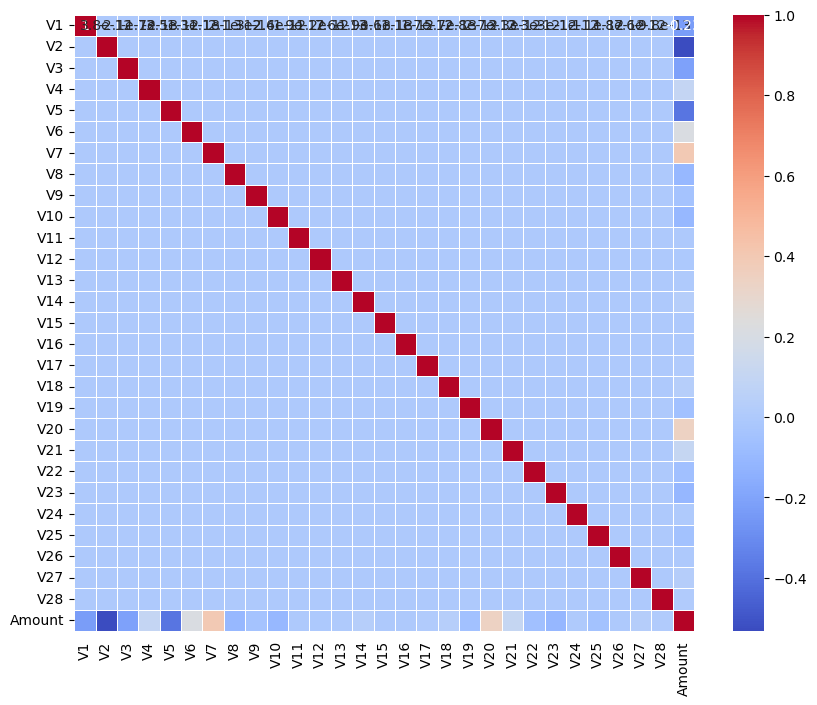

In [28]:
#Matriz de correlación
base_correlacion=base.drop(['Time', 'Class'], axis=1)
correlation_matrix = base_correlacion.corr()

plt.figure(figsize=(10, 8))
mapa=sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

mapa.xaxis.set_ticks_position('none')

plt.show() 

In [ ]:
"""
Se puede observar que en todas las variables de la base son independientes entre sí, menos amount, la cual guarda cierta correlación 
con algunas variables. Esta independencia será muy importante más adelante para el modelo de Naive-Bayes.
"""

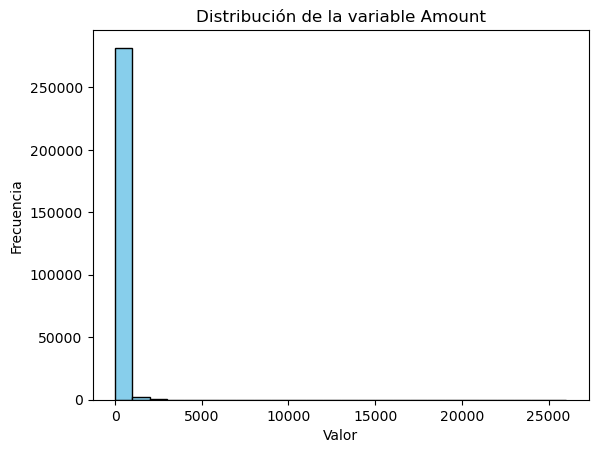

In [31]:
#Distribución de Amount
binwidth = 1000
bins = np.arange(min(base['Amount']), max(base['Amount']) + binwidth, binwidth)

plt.hist(base['Amount'], bins=bins, color='skyblue', edgecolor='black')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable Amount')


plt.show()

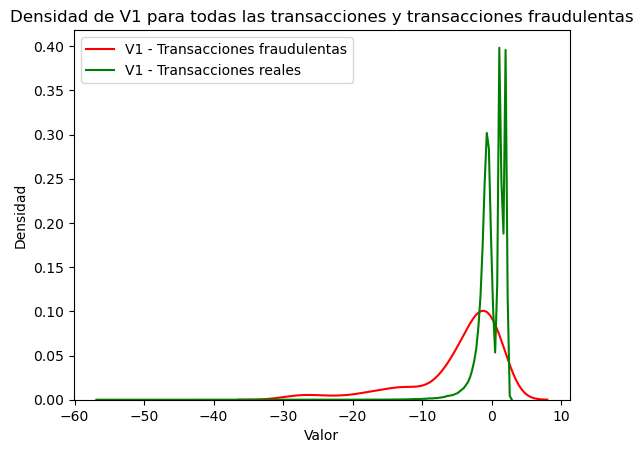

In [33]:
#Comparación de densidades de V1 según si es fraudulenta o no
#Gráfico de densidad para la columna V1 de las transacciones fraudulentas
base_fraudulentas = base[base['Class'] == 1]
base_reales = base[base['Class'] == 0]

sns.kdeplot(base_fraudulentas['V1'], label='V1 - Transacciones fraudulentas', fill=False, color='red')

#Gráfico de densidad para la columna V1 de las transacciones 
sns.kdeplot(base_reales['V1'], label='V1 - Transacciones reales', fill=False, color='green')

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Densidad de V1 para todas las transacciones y transacciones fraudulentas')
plt.legend()

In [ ]:
"""
En la gráfica anterior, se puede observar que las transacciones fraudulentas se comportan distinto a las trasacciones reales con respecto
a la variable V1. En general las fraudulentas tienen una cola más pesada en la izquierda, por lo que tiene mayor probabilidad de tomar
valores negativos que las no fraudulentas. Este tipo de análisis se puede replicar para el resto de las variables como se hace a continuación:
"""

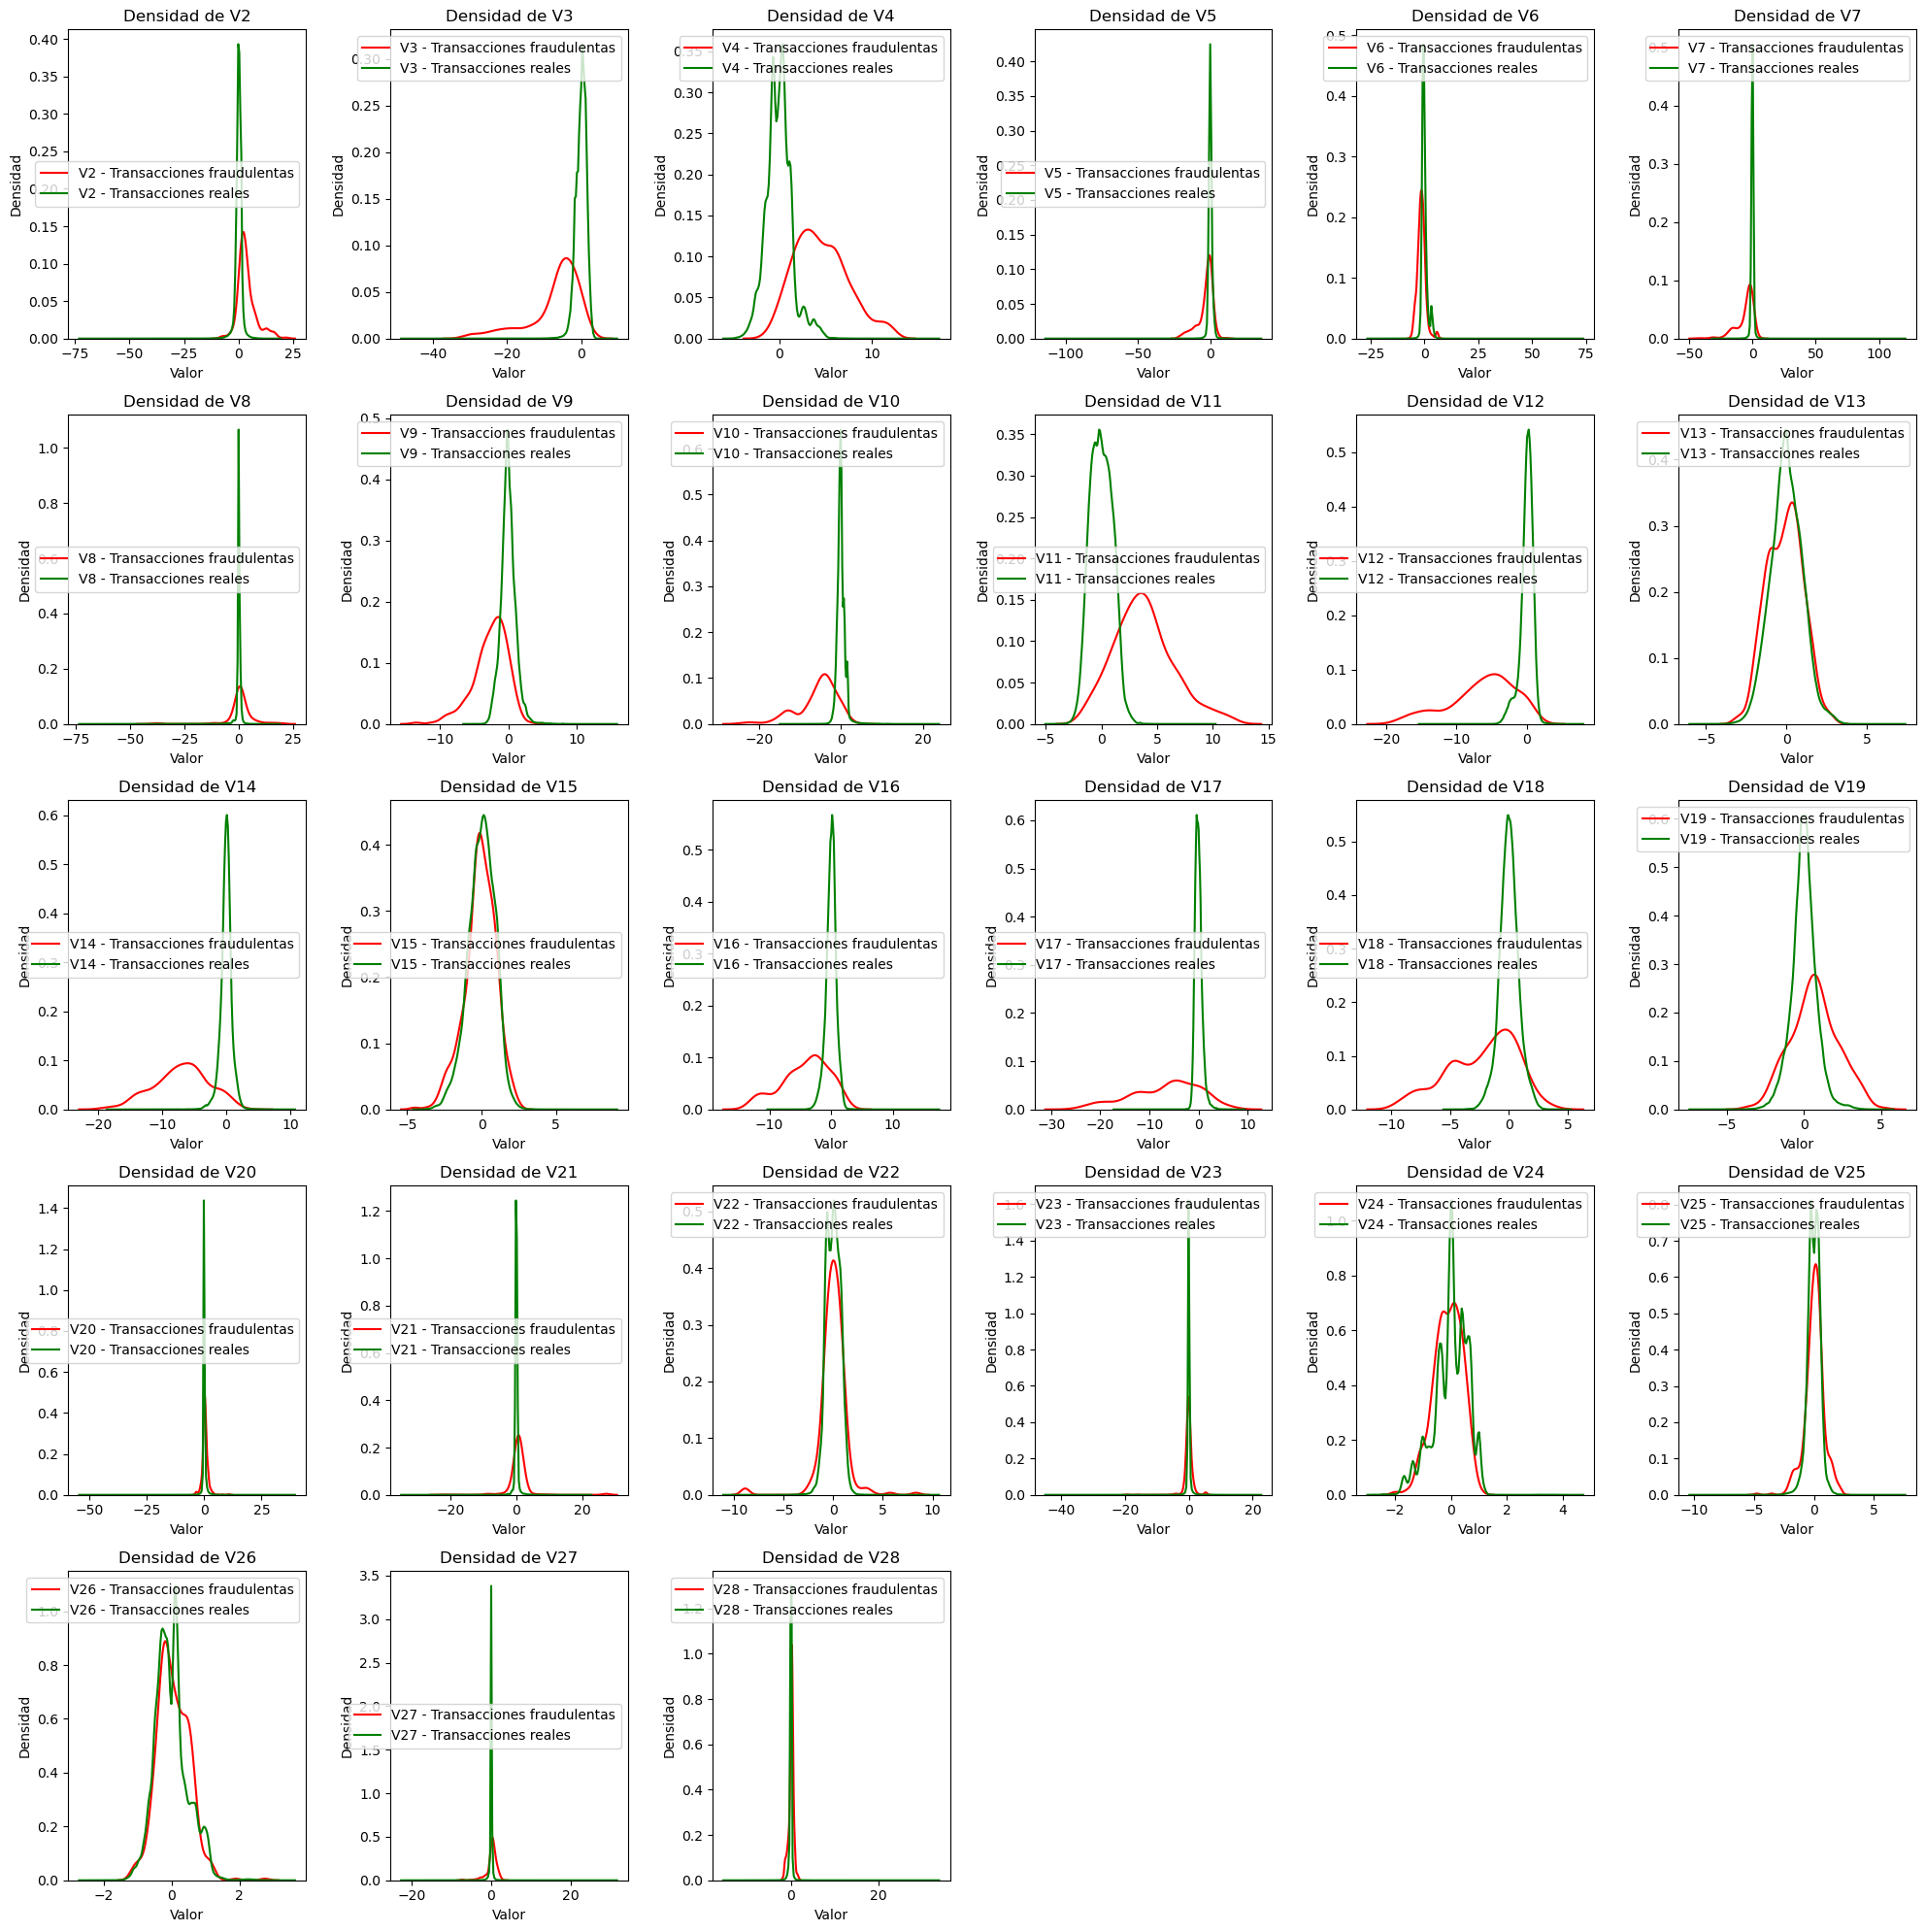

In [34]:
# Lista de variables a graficar 
variables = [f'V{i}' for i in range(2, 29)]  #Genera la lista de V2 a V28

# Configuración de la cuadrícula de gráficos
num_vars = len(variables)
cols = 6  
rows = (num_vars + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

# Generar los gráficos de densidad
for i, var in enumerate(variables):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    
    sns.kdeplot(base_fraudulentas[var], label=f'{var} - Transacciones fraudulentas', fill=False, color='red', ax=ax)
    sns.kdeplot(base_reales[var], label=f'{var} - Transacciones reales', fill=False, color='green', ax=ax)
    
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad')
    ax.set_title(f'Densidad de {var}')
    ax.legend()

# Eliminar ejes vacíos si hay un número impar de gráficos
if num_vars % cols != 0:
    for j in range(num_vars, rows * cols):
        if j >= num_vars:
            fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

In [ ]:
"""
En general, se puede observar cambios significativos en algunas variables como en la 11 o la 14, lo que puede indicar que estas variables
pueden ser clave para ayudarnos a predecir si una transacción es fraudulenta o no. 
"""

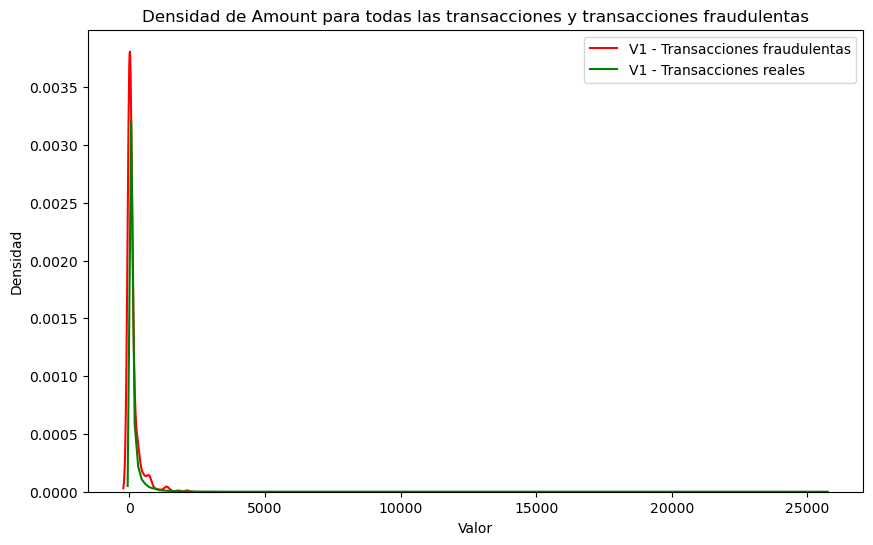

In [35]:
#Comparando amount para fraudulentas y para no fraudulentas
plt.figure(figsize=(10, 6))

#Gráfico de densidad para la columna Amount de las transacciones fraudulentas
sns.kdeplot(base_fraudulentas['Amount'], label='V1 - Transacciones fraudulentas', fill=False, color='red')

#Gráfico de densidad para la columna Amount de las transacciones no fraudulentas
sns.kdeplot(base_reales['Amount'], label='V1 - Transacciones reales', fill=False, color='green')

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Densidad de Amount para todas las transacciones y transacciones fraudulentas')
plt.legend()

plt.show()

## Naive-Bayes

In [36]:
#Se toman las columnas con las variables y se insertan en el df X
X = base.iloc[:, :-1] 
#Se elimina la variable 'Amount' porque tiene una correlación distinta de cero con las demás 
#características y para el modelo Naive Bayes se necesita independencia
del X["Amount"]
#Se toman los valores de la variable a predecir
y = base.iloc[:, -1]

#Se separa la base es una train y test, con un 80% de los datos para entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Se importa de la librería sklearn la clase que realiza el modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Se define el modelo
naive_bayes = GaussianNB()
#Se entrena al modelo
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

from sklearn.metrics import precision_score
# Evaluamos el rendimiento del modelo
#Se crea un df con el valor real y el valor predicho
resultados = {
    'valor_real' : list(y_test),
    'valor_predicho': list(y_pred)
}
resultados = pd.DataFrame(resultados)
#Se crea un df solo con los fraudulentos para ver el procentaje de fallo del modelo en predecir 
#si la transacción era o no fraudulenta
Fraudes = resultados.groupby("valor_real").get_group(1)
porcentaje_aciertos = 100 - ((Fraudes['valor_predicho'] == 0).sum()) / Fraudes.shape[0] * 100
print(porcentaje_aciertos)

63.265306122448976


## Regresión logística

In [38]:
# A continuación se presenta un código paso a paso para realizar una regresión logística

# 1) Separamos la base en las covariables y la variable a predecir

covariables = base.loc[:, base.columns != 'Class']
predecir = base.Class

# 2) Separamos cada uno de estos dataframes en un train y test para probar el modelo (usamos una semilla para reproducir siempre el mismo resultado)

covariables_train, covariables_test, predecir_train, predecir_test = train_test_split(covariables, predecir, test_size=0.3, random_state=50)

# 3) Creamos la regresión logística

regresion_log = LogisticRegression()

# 4) Entrenamos el modelo de la regresión con nuestros dataframes de training

regresion_log.fit(covariables_train, predecir_train)

# 5) Predecimos si la transacción en fradulenta o no con base al modelo entrenado

prediccion = regresion_log.predict(covariables_test)

In [39]:
# Evaluamos el rendimiento del modelo

# 1) Usamos una matriz de confusión

matriz_cnf = confusion_matrix(predecir_test, prediccion)
print(matriz_cnf)

# 2) Calculamos el rendimiento

target_names = ['Transaccion comun', 'Transaccion Fraudulenta']
print(classification_report(predecir_test, prediccion, target_names=target_names))

# 3) Sacamos porcentajes de precisión

precision_score(predecir_test, prediccion, average = None)

[[85256    40]
 [   38   109]]
                         precision    recall  f1-score   support

      Transaccion comun       1.00      1.00      1.00     85296
Transaccion Fraudulenta       0.73      0.74      0.74       147

               accuracy                           1.00     85443
              macro avg       0.87      0.87      0.87     85443
           weighted avg       1.00      1.00      1.00     85443



array([0.99955448, 0.73154362])

## KNN

### k=3

In [41]:

# Seleccionar todas las columnas excepto la columna objetivo ('Class')
X = base.drop('Class', axis=1)
y = base['Class']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Definir y entrenar el modelo KNN
algoritmo = KNeighborsClassifier(n_neighbors=3) #Aquí se define el numeor de vecinos
algoritmo.fit(X_train, y_train)

# Predicción de etiquetas para el conjunto de prueba
y_pred = algoritmo.predict(X_test)

# Cálculo de la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(matriz)

# Calcular el número de clasificaciones correctas e incorrectas
clasificaciones_correctas = matriz.diagonal().sum()
clasificaciones_incorrectas = matriz.sum() - clasificaciones_correctas

print(f'Número de clasificaciones correctas: {clasificaciones_correctas}')
print(f'Número de clasificaciones incorrectas: {clasificaciones_incorrectas}')


# Calcular la precisión del modelo utilizando solo los datos de prueba
precision = accuracy_score(y_test, y_pred) * 100
print(f'Porcentaje de precisión del modelo: {precision:.2f}%')

#Calculamos el rendimiento
from sklearn.metrics import classification_report

target_names = ['Transaccion comun', 'Transaccion Fraudulenta']
print(classification_report(y_test, y_pred, target_names=target_names))


Matriz de confusión:
[[56868     0]
 [   87     7]]
Número de clasificaciones correctas: 56875
Número de clasificaciones incorrectas: 87
Porcentaje de precisión del modelo: 99.85%
                         precision    recall  f1-score   support

      Transaccion comun       1.00      1.00      1.00     56868
Transaccion Fraudulenta       1.00      0.07      0.14        94

               accuracy                           1.00     56962
              macro avg       1.00      0.54      0.57     56962
           weighted avg       1.00      1.00      1.00     56962



### 7

In [42]:
# Seleccionar todas las columnas excepto la columna objetivo ('Class')
X = base.drop('Class', axis=1)
y = base['Class']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Definir y entrenar el modelo KNN
algoritmo = KNeighborsClassifier(n_neighbors=7) #Aquí se define el numeor de vecinos
algoritmo.fit(X_train, y_train)

# Predicción de etiquetas para el conjunto de prueba
y_pred = algoritmo.predict(X_test)

# Cálculo de la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(matriz)


# Calcular el número de clasificaciones correctas e incorrectas
clasificaciones_correctas = matriz.diagonal().sum()
clasificaciones_incorrectas = matriz.sum() - clasificaciones_correctas
print(f'Número de clasificaciones correctas: {clasificaciones_correctas}')
print(f'Número de clasificaciones incorrectas: {clasificaciones_incorrectas}')


# Calcular la precisión del modelo utilizando solo los datos de prueba
precision = accuracy_score(y_test, y_pred) * 100
print(f'Porcentaje de precisión del modelo: {precision:.2f}%')

#Calculamos el rendimiento
from sklearn.metrics import classification_report

target_names = ['Transaccion comun', 'Transaccion Fraudulenta']
print(classification_report(y_test, y_pred, target_names=target_names))

Matriz de confusión:
[[56868     0]
 [   89     5]]
Número de clasificaciones correctas: 56873
Número de clasificaciones incorrectas: 89
Porcentaje de precisión del modelo: 99.84%
                         precision    recall  f1-score   support

      Transaccion comun       1.00      1.00      1.00     56868
Transaccion Fraudulenta       1.00      0.05      0.10        94

               accuracy                           1.00     56962
              macro avg       1.00      0.53      0.55     56962
           weighted avg       1.00      1.00      1.00     56962



### Validacion Cruzada

In [43]:
def evaluar_modelo_knn(df, n_neighbors):
    # Seleccionar todas las columnas excepto la columna objetivo ('Class')
    X = df.drop('Class', axis=1)
    y = df['Class']

    # Estandarizar los datos
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Definir el modelo KNN
    algoritmo = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Realizar validación cruzada y obtener las predicciones
    y_pred = cross_val_predict(algoritmo, X, y, cv=5)

    # Calcular y mostrar la matriz de confusión
    matriz = confusion_matrix(y, y_pred)
    print('Matriz de confusión:')
    print(matriz)

    # Calcular el número de clasificaciones correctas e incorrectas
    clasificaciones_correctas = matriz.diagonal().sum()
    clasificaciones_incorrectas = matriz.sum() - clasificaciones_correctas

    print(f'Número de clasificaciones correctas: {clasificaciones_correctas}')
    print(f'Número de clasificaciones incorrectas: {clasificaciones_incorrectas}')
    
    # Calcular la precisión del modelo utilizando validación cruzada
    precision = accuracy_score(y, y_pred) * 100
    print(f'Porcentaje de precisión del modelo: {precision:.2f}%')

    # Calcular el informe de clasificación
    target_names = ['Transaccion comun', 'Transaccion Fraudulenta']
    print(classification_report(y, y_pred, target_names=target_names))

In [44]:
# k=3
evaluar_modelo_knn(base, 3)

Matriz de confusión:
[[284233     82]
 [   136    356]]
Número de clasificaciones correctas: 284589
Número de clasificaciones incorrectas: 218
Porcentaje de precisión del modelo: 99.92%
                         precision    recall  f1-score   support

      Transaccion comun       1.00      1.00      1.00    284315
Transaccion Fraudulenta       0.81      0.72      0.77       492

               accuracy                           1.00    284807
              macro avg       0.91      0.86      0.88    284807
           weighted avg       1.00      1.00      1.00    284807



In [ ]:
#k=7
evaluar_modelo_knn(base, 7)

## Árbol

In [45]:
#separar en las variables predictorias y la variable a predecir
X = base.iloc[:,0:30]
Y = base.iloc[:,30] #la  variable a predecir es clase

X.head()

#dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#si no quiero generar el arbol completo puedo poner (max_depth = 4)
arbol = DecisionTreeClassifier()

#la funcion fit entrena el modelo
arbol_transaccion = arbol.fit(X_train,Y_train)

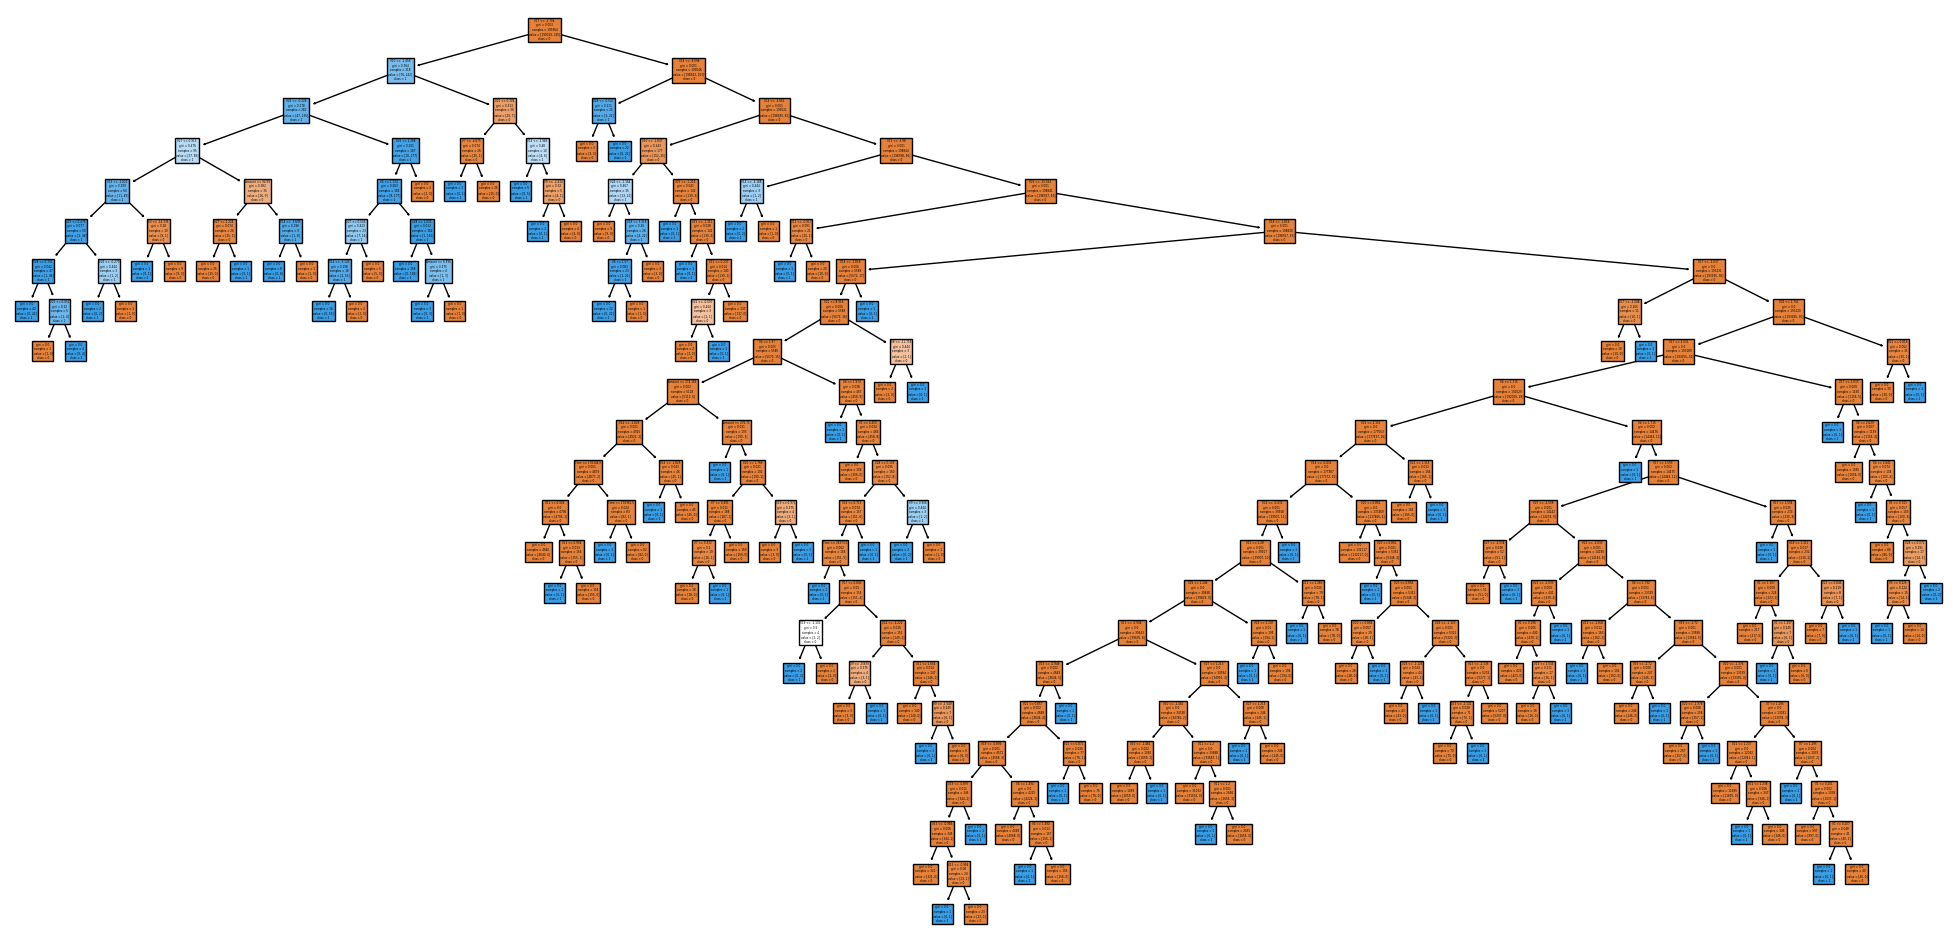

In [46]:
plt.figure(figsize=(25,12))  #Tamano del arbol
plot_tree(arbol_transaccion, feature_names=X.columns, class_names=['0', '1'], filled=True)  #feature names me da la columna y el umbral con el cual van a ser divididos los datos
#gini es la pureza del nodo, entre menor es mejor la division
#samples cantidad de individuos que cumplen las condiciones
#lista con la cantidad de individuos (No fraude, Fraude)
plt.show()

In [47]:
#creamos una matriz de confusion
Y_pred = arbol_transaccion.predict(X_test)

Matriz = confusion_matrix(Y_test, Y_pred)

Matriz

array([[85267,    29],
       [   39,   108]])

In [48]:
#vamos a ver la precisión
from sklearn.metrics import classification_report

target_names = ['Transaccion comun', 'Transaccion Fraudulenta']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                         precision    recall  f1-score   support

      Transaccion comun       1.00      1.00      1.00     85296
Transaccion Fraudulenta       0.79      0.73      0.76       147

               accuracy                           1.00     85443
              macro avg       0.89      0.87      0.88     85443
           weighted avg       1.00      1.00      1.00     85443

